In [1]:
import numpy as np

In [2]:
height = 2
width = 3
data = np.arange(6).reshape((2, 3))
data

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
A = np.array([[1, 0],
              [0, -1]])

A

array([[ 1,  0],
       [ 0, -1]])

In [4]:
for x2 in range(height):
    for x1 in range(width):
        v = np.array([x1, x2])
        new_vector = A.dot(v)
        print(f'{v} --> {new_vector}')
    print()

[0 0] --> [0 0]
[1 0] --> [1 0]
[2 0] --> [2 0]

[0 1] --> [ 0 -1]
[1 1] --> [ 1 -1]
[2 1] --> [ 2 -1]



In [5]:
for x2 in range(height):
    for x1 in range(width):
        v = np.array([x1, x2])
        new_vector = A.dot(v) + np.array([0, height-1])
        print(f'{v} --> {new_vector}')
    print()

[0 0] --> [0 1]
[1 0] --> [1 1]
[2 0] --> [2 1]

[0 1] --> [0 0]
[1 1] --> [1 0]
[2 1] --> [2 0]



In [6]:
for x2 in range(height):
    for x1 in range(width):
        v = np.array([x1, x2])
        new_x1, new_x2 = A.dot(v) + np.array([0, height-1])
        print(f'{v} --> ({new_x2}, {new_x1})')
    print()

[0 0] --> (1, 0)
[1 0] --> (1, 1)
[2 0] --> (1, 2)

[0 1] --> (0, 0)
[1 1] --> (0, 1)
[2 1] --> (0, 2)



In [7]:
output = np.zeros(shape=(height, width), dtype=int)

for x2 in range(height):
    for x1 in range(width):
        v = np.array([x1, x2])
        new_x1, new_x2 = A.dot(v) + np.array([0, height-1])
        output[new_x2, new_x1] = data[x2, x1]

output

array([[3, 4, 5],
       [0, 1, 2]])

### Least Squares Estimation

In [8]:
A = np.array([1, 2, 3, 4]).reshape((2, 2))
B = np.linalg.inv(A)

A @ B

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [9]:
np.linalg.det(np.arange(9).reshape((3,3)))

0.0

In [10]:
A = np.array([[6.7, 1],
              [4.6, 1],
              [3.5, 1],
              [5.5, 1]])

y = np.array([9.1, 5.9, 4.6, 6.7])

ATA = A.T @ A

det_ATA = np.linalg.det(ATA)

if det_ATA != 0:
    x = np.dot(np.linalg.inv(ATA),A.T @ y)
    print(x)

[ 1.37268204 -0.39136137]


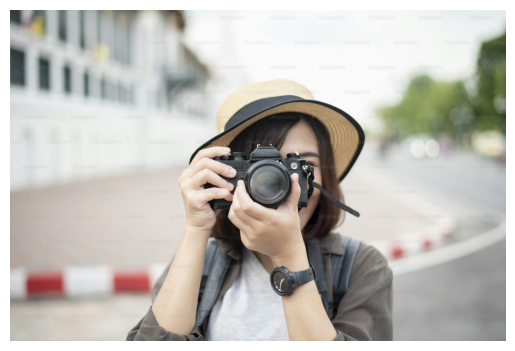

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('1.jpg')

def showImage(img: np.ndarray) -> None:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img = img[:,:,::-1]

showImage(img)

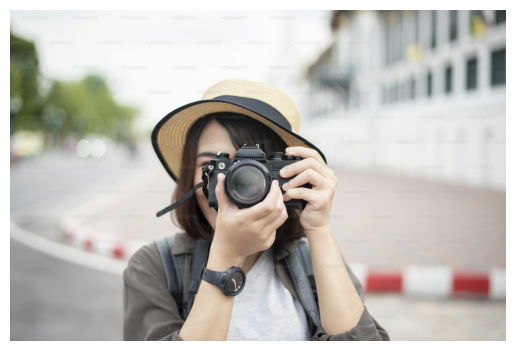

In [12]:
showImage(img[:,::-1,:])

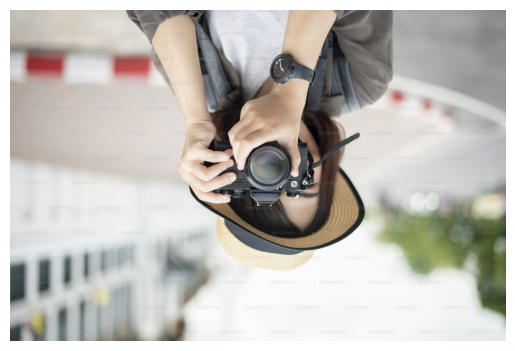

In [13]:
showImage(img[::-1, :, :])

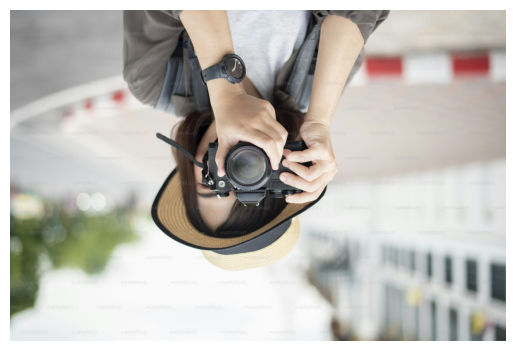

In [14]:
showImage(img[::-1, ::-1, :])

### Cosine Similarity

In [15]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 3, 4])

def computeCosineSimilarity(a: np.ndarray, b: np.ndarray) -> float:
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

computeCosineSimilarity(a, b)

1.0

In [16]:
lst_vectors = np.array([
    np.array([1, 2, 3, 4]),
    np.array([1, 2, 3, 4.5]),
    np.array([1, 2, 3, 5]),
    np.arange(4),
    np.array([2, 4, 6, 8])
])

query_vector = np.array([1, 2, 3, 4])

def computeCosineSimilarity(lst_vectors: np.ndarray, query_vector: np.ndarray) -> np.ndarray:
    return lst_vectors @ query_vector / (np.linalg.norm(lst_vectors, axis=1) * np.linalg.norm(query_vector))

computeCosineSimilarity(lst_vectors, query_vector)

array([1.        , 0.99829538, 0.99399909, 0.97590007, 1.        ])

In [17]:
x = np.array([1, 2])
P = np.array([
    [-1, 0],
    [0, 1]
])
np.dot(x, P)

array([-1,  2])

In [18]:
img = np.arange(12).reshape((3, 4))

img

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
new_img = np.zeros(img.shape, dtype=int)

new_img

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [20]:
H, W = img.shape

H, W

(3, 4)

In [21]:
P = np.array([
    [-1, 0],
    [0, 1]
])

for x2 in range(H):
    for x1 in range(W):
        v = np.array([x1, x2])
        new_x1, new_x2 = P.dot(v) + np.array([W-1, 0])
        new_img[new_x2, new_x1] = img[x2, x1]

new_img

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8]])

In [22]:
feature = np.array([6.7, 4.6, 3.5, 5.5]).reshape((4, 1))

feature

array([[6.7],
       [4.6],
       [3.5],
       [5.5]])

In [23]:
feature = np.hstack((feature, np.ones_like(feature)))

feature

array([[6.7, 1. ],
       [4.6, 1. ],
       [3.5, 1. ],
       [5.5, 1. ]])

In [24]:
y = np.array([9.1, 5.9, 4.6, 6.7])

x = np.linalg.inv(feature.T@feature)@(feature.T@y)

x

array([ 1.37268204, -0.39136137])

In [25]:
import cv2
import numpy as np

img = cv2.imread('images/1.jpg')
img1 = img.astype(float)

img1 = img1 - 100

img1 = np.where(img1 >= 0, img1, 0)

img1 = img1.astype(np.uint8)

cv2.imwrite('images/2.jpg', img1)

True

In [26]:
img2 = cv2.flip(img, flipCode=2)
cv2.imwrite('images/3.jpg', img2)

True

In [27]:
img3 = cv2.imread('images/4.jpg')
img3 = cv2.resize(src=img3, dsize=(612, 612))
img3.shape

(612, 612, 3)

In [28]:
print(img.shape)
print(img1.shape)
print(img2.shape)
print(img3.shape)

(612, 612, 3)
(612, 612, 3)
(612, 612, 3)
(612, 612, 3)


In [29]:
L1_s1_s2 = np.sum(np.abs(img-img1)) / (612*612*3)
print(L1_s1_s2)

78.93647030344455


In [30]:
L1_s1_s3 = np.sum(np.abs(img-img2)) / (612*612*3)
print(L1_s1_s3)

37.40646759793242


In [31]:
L1_s1_s4 = np.sum(np.abs(img-img3)) / (612*612*3)
print(L1_s1_s4)

92.99333856636336


L1 là absolute difference

In [32]:
images_aray = np.array([
    img1.flatten(),
    img2.flatten(),
    img3.flatten()
])

computeCosineSimilarity(images_aray, img.flatten())

array([3.76732411e-09, 1.62699871e-09, 3.75560025e-10])

In [33]:
def cos_sin(x, y):
    x = x.flatten()
    y = y.flatten()

    x = x.astype(np.float64)
    y = y.astype(np.float64)

    cos_sin = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

    return cos_sin

In [34]:
cos_sin(img, img1)

0.9962220105514585

In [35]:
cos_sin(img, img2)

0.9800170400285328

In [36]:
cos_sin(img, img3)

0.959743893097568

In [37]:
import numpy as np

petal_length = np.array([1.4, 1, 1.5, 3.1, 3.7, 4.1])
label = np.array([0, 0, 0, 1, 1, 1])

x_new = 2.4
distance = np.abs(petal_length - x_new)
distance

array([1. , 1.4, 0.9, 0.7, 1.3, 1.7])

In [40]:
petal_length = np.array([1.4, 1.3, 1.4, 4, 4.7, 3.6])
petal_width = np.array([0.2, 0.4, 0.3, 1, 1.4, 1.3])
label = np.array([0, 0, 0, 1, 1, 1])

x_test = np.array([2.4, 0.8])
distance = np.sqrt((x_test[0] - petal_length)**2 + (x_test[1] - petal_width)**2)

distance

array([1.16619038, 1.17046999, 1.11803399, 1.61245155, 2.37697286,
       1.3       ])